## Growth and Breakup Rate Functionality

### Overview

This notebook explores the growth, $A$, and breakup, $B$, rate terms in the Winterwerp (1998) model:

$$ \frac{d(d_f)}{dt}=A-B$$

where, $d_f$ is the floc size. $A$ and $B$ are defined by:

$$A=k_{a}^{'}\frac{{d_{p}}^{n_{f}-3}}{n_{f}\rho _{s}}GCd_{f}^{4-n_{f}} = K_{A}GCd_{f}^{4-n_{f}}$$

and

$$B=k_{b}^{'}\frac{{d_{p}}^{-p}}{n_{f}}\left ( \frac{\mu }{F_{y}} \right )^{q}G^{q+1}\left ( d_{f}-d_{p} \right )^{p}d_{f}^{2q+1} = K_{B}G^{q+1}\left ( d_{f}-d_{p} \right )^{p}d_{f}^{2q+1}$$

Here, $G$ is the turbulent shear rate, $C$ is the suspended sediment concentration, $d_p$ is the primary particle size, $n_f$ is the fractal dimension of the flocs, $k_{a}^{'}$ is the collision efficiency coefficient that accounts for the fact that not all collisions result in aggregation. $k_{a}^{'}$ is an empirical coefficient that needs to be calibrated for each suspension of mud. $k_{b}^{'}$ is the breakup coefficient, and $p$ and $q$ are empirical coefficients. In the model, $F_{y}$ and $k_{b}^{'}$ are functions of the physiochemical properties of the sediment and water that need to be empirically determined. Winterwerp suggested a reasonable value of $F_{y} = 10^{-10}$ N for estuarine flocs, and $p=3-n_{f}$ and $q$ to be 0.5, respectively.

** References **

Winterwerp, J. C. (1998). A simple model for turbulence induced flocculation of cohesive sediment. Journal of Hydraulic Research, 36(3):309–326.

### Initial setup

In [1]:
%pylab inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Populating the interactive namespace from numpy and matplotlib


In [2]:
Clower = 0
Cupper = 1
C=linspace(Clower,Cupper,1000)
D=linspace(5e-6,500e-6,1000)
G=linspace(0,100,1000)

In [3]:
kap = 0.689 # 0.3095
kbp = 1.08e-5 # 3.54e-5

nf = 2
dp = 5e-6
rhos = 2650
q = 0.5
p = 3-nf
Fy = 10**-10
mu = 1e-3

### Changes in $A$ and $B$ due to changes in floc size alone

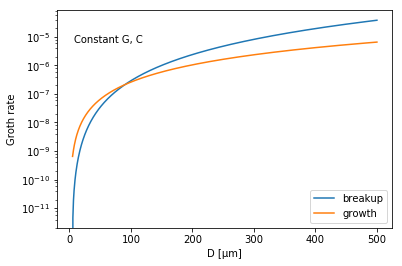

In [4]:
DD = D
CC = 0.05
GG = 20

Ka = kap*dp**(nf-3)/(nf*rhos)
Kb = kbp*(dp**-p/nf)*(mu/Fy)**q

growth = Ka*CC*GG*DD**(4-nf)
breakup = Kb*GG**(q+1)*(DD-dp)**p*DD**(2*q+1)

plot(D*10**6,breakup, label='breakup')
plot(D*10**6,growth, label='growth')
yscale('log')
legend(loc=4)
ylabel('Groth rate')
xlabel('D [µm]')
annotate('Constant G, C', xy=(0.05, 0.85), xycoords='axes fraction');

### Changes in $A$ and $B$ due to changes in turbulent shear rate, $G$, alone

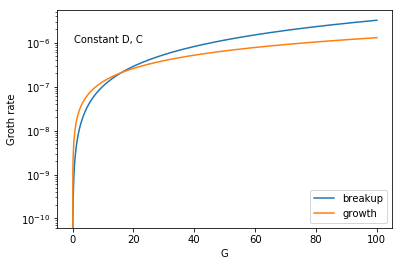

In [5]:
DD = 100e-6
CC = 0.05
GG = G

Ka = kap*dp**(nf-3)/(nf*rhos)
Kb = kbp*(dp**-p/nf)*(mu/Fy)**q

growth = Ka*CC*GG*DD**(4-nf)
breakup = Kb*GG**(q+1)*(DD-dp)**p*DD**(2*q+1)

plot(G,breakup, label='breakup')
plot(G,growth, label='growth')
yscale('log')
legend(loc=4)
ylabel('Groth rate')
xlabel('G')
annotate('Constant D, C', xy=(0.05, 0.85), xycoords='axes fraction');

### Changes in $A$ and $B$ due to changes in suspended sediment concentration, $C$, alone

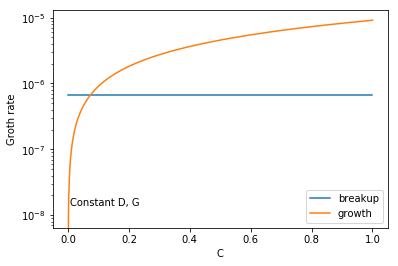

In [6]:
DD = 100e-6
CC = C
GG = 35

Ka = kap*dp**(nf-3)/(nf*rhos)
Kb = kbp*(dp**-p/nf)*(mu/Fy)**q

growth = Ka*CC*GG*DD**(4-nf)
breakup = Kb*GG**(q+1)*(DD-dp)**p*DD**(2*q+1)

breakup_array=empty(1000); breakup_array.fill(breakup)

plot(C,breakup_array, label='breakup')
plot(C,growth, label='growth')
yscale('log')
legend(loc=4)
ylabel('Groth rate')
xlabel('C')
annotate('Constant D, G', xy=(0.05, 0.1), xycoords='axes fraction');

### The approach to equilibrium through growth or breakup

Below the rate and total time it takes for a floc that is out of equilibrium with the local conditions (denoted by the size $d_o$) to get back to equilibrium size, $d_{\mathit{fe}}$, is explored. 

8.511470514282516e-05
0.00015022941028565033


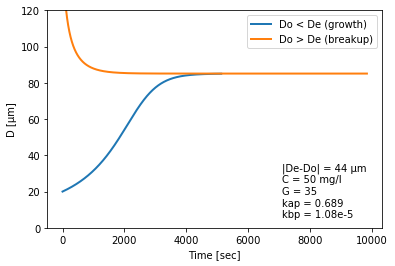

In [7]:
do=20e-6

C1= 0.05
G1 = 20

a=Ka*C1*G1
b=Kb*G1**(3/2)

dfe=a/b
print(dfe)

do2=((dfe-do)+dfe)
print(do2)

df=linspace(do,0.999*dfe,10000)
df2=linspace(do2,1.0000000001*dfe,1000000)

lnterm=log((dfe-do)*df/((dfe-df)*do))
lnterm2=log((dfe-do2)*df2/((dfe-df2)*do2))

t=(b/a**2)*(lnterm-(dfe/df)+(dfe/do))
t2=(b/a**2)*(lnterm2-(dfe/df2)+(dfe/do2))

plot(t,df*10**6, linewidth=2, label='Do < De (growth)')
plot(t2,df2*10**6, linewidth=2,  label='Do > De (breakup)')

#tick_params(direction='out',width=1)

#xlim(0,3500)
ylim(0,120)
legend(loc=1)
xlabel('Time [sec]')
ylabel('D [µm]')

annotate('|De-Do| = 44 µm\nC = 50 mg/l\nG = 35\nkap = 0.689\nkbp = 1.08e-5', xy=(0.7, 0.05), xycoords='axes fraction')
savefig('Approach_to_dfe.pdf')

In [8]:
tgrow=(b/a**2)*(log((dfe-do)/do)+1+dfe/do)
print(tgrow)
tbreak=(b/a**2)*(log((do2-dfe)/do2)+1.5+dfe/do2)
print(tbreak)

2908.36184939
556.060355744
